In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib import cm
from matplotlib.colors import hsv_to_rgb
import numpy as np
import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

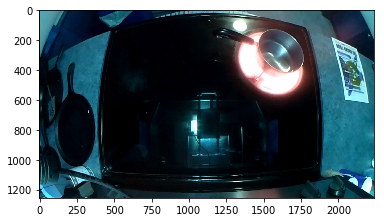

In [2]:
stove = cv2.imread('../../Desktop/Stove.jpg')
plt.imshow(stove)
plt.show()

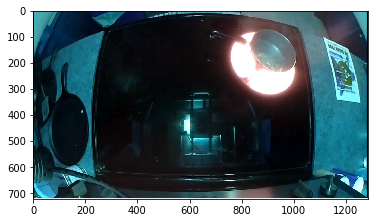

In [3]:
stove2 = cv2.imread('../../Desktop/Stove_boil.jpg')
plt.imshow(stove2)
plt.show()

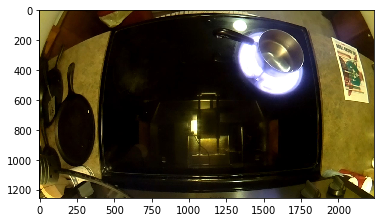

In [4]:
stove = cv2.cvtColor(stove, cv2.COLOR_BGR2RGB)

plt.imshow(stove)
plt.show()

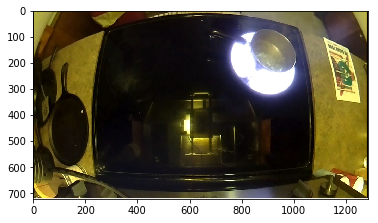

In [5]:
stove2 = cv2.cvtColor(stove2, cv2.COLOR_BGR2RGB)

plt.imshow(stove2)
plt.show()

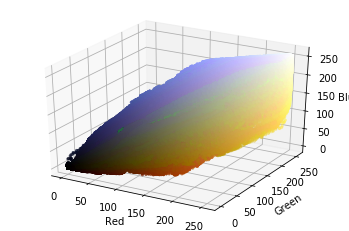

In [6]:
# Plotting the image on 3D plot

r, g, b = cv2.split(stove)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = stove.reshape((np.shape(stove)[0] * np.shape(stove)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(
    r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

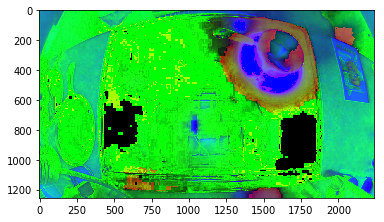

In [7]:
hsv_stove = cv2.cvtColor(stove, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_stove)
plt.show()

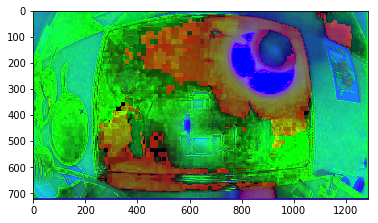

In [8]:
hsv_stove2 = cv2.cvtColor(stove2, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_stove2)
plt.show()

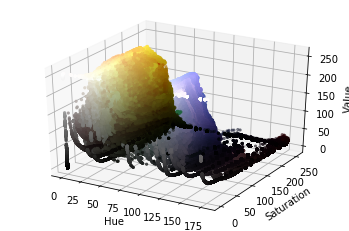

In [9]:
h, s, v = cv2.split(hsv_stove)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [10]:
light_blue = (27,200,15)
dark_blue = (100,255,150)

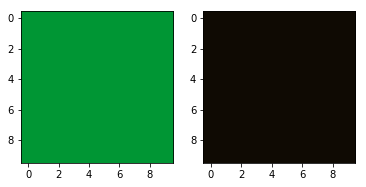

In [11]:
# Normalise to 0 - 1 range for viewing

lo_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

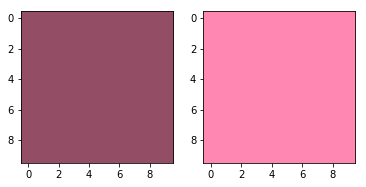

In [12]:
light_blue = (240,120,255)
dark_blue = (240,121,147)
# Normalise to 0 - 1 range for viewing

lo_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

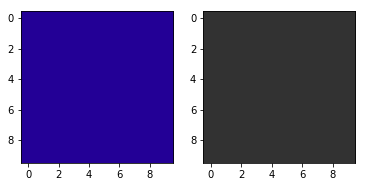

In [13]:
light_blue = (0,0,50)
dark_blue = (180,255,150)
# Normalise to 0 - 1 range for viewing

lo_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

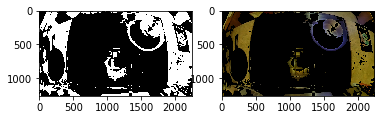

In [14]:
# showing the best result with the pot
mask = cv2.inRange(hsv_stove, light_blue, dark_blue)
result = cv2.bitwise_and(stove, stove, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

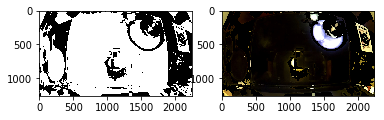

In [15]:
mask_inverse = cv2.inRange(hsv_stove, light_blue, dark_blue)
mask = cv2.bitwise_not(mask_inverse)
result = cv2.bitwise_and(stove, stove, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

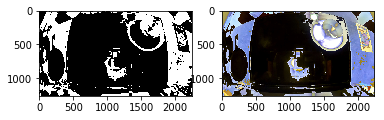

In [16]:
mask = cv2.inRange(hsv_stove, light_blue, dark_blue)
result = cv2.bitwise_not(stove, stove, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

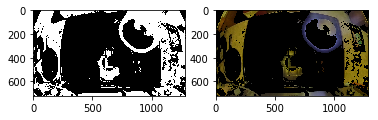

In [17]:
# showing the best result with the pot
mask = cv2.inRange(hsv_stove2, light_blue, dark_blue)
result = cv2.bitwise_and(stove2, stove2, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [18]:
from skimage.measure import compare_ssim
import argparse
import imutils
import numpy as np

In [19]:
stove_resized = cv2.imread('../../Desktop/Stove_size.jpg')
stove_no_light = cv2.imread('../../Desktop/Stove_no_light_boil.jpg')

In [20]:
# compares the stove at the beginning of the video and a picture of it once a bit of time has elapsed
# water is not yet boiling
#imageA = cv2.resize(stove_resized, None, fx=1, fy=1, interpolation=cv2.INTER_AREA)
#imageB = cv2.resize(stove2, None, fx=1, fy=1, interpolation=cv2.INTER_AREA)
imageA = cv2.bitwise_and(stove_resized, stove_resized, mask=mask)
imageB = cv2.bitwise_and(stove2, stove2, mask=mask)
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))


SSIM: 0.8811680007777477


In [21]:
# the image the original stove is being compared to contains a boiling pot of water
imageC = cv2.resize(stove_no_light, None, fx=1, fy=1, interpolation=cv2.INTER_AREA)
cv2.bitwise_and(stove_no_light, stove_resized, mask=mask)
grayC = cv2.cvtColor(imageC, cv2.COLOR_BGR2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayC, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.3489788853937488
